# LPM and Logistic/Probit Model
---

## Binary outcomes

- Binary outcomes are everywhere

- We typically want to understand what is the probability of the binary outcome given explanatory variables

- We want to model the probability given covariates
$$P(y=1 | x)=f(\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p})$$

## Linear Probability Models

We could actually use the linear model to do so.

$$E(y | x)=P(y=1 | x)=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\ldots+\beta_{k} x_{k}+\mu$$

- If $y$ is an indicator or dummy variable, then $E[y|x]$ is the proportion of 1s given $x$, which we interpret as a probability of $y$ given $x$. 

- We can then interpret the parameters as the change in the probability of $y$ when $x$ changes by one unit or for a small change in $x$.

**Example**

For example, if we model

$$died_{i}=\beta_{0}+\beta_{1} age_{i}+\mu_{i}$$

We could interpret $\beta_{1}$ as the change in the probability of death for an additional year of age.

<br>

The problem is that **we know that this model is not entirely correct**. Recall that in the linear model we assume

$$Y \sim N\left(\beta_{0}+\beta_{1} X_{1}+\cdots+\beta_{p} X_{p}, \sigma^{2}\right)$$

That is, Y distributes normal **conditional on Xs**.

Obviously, a 1/0 variable can’t distribute normal, and $\mu$ can’t be normally distributed either.

**The big picture**

- The model is not correct but it is extremely useful as a first step for analyzing the data.

- In particular, it is very useful because we can interpret the parameters in the probability scale, which is the scale of interest.

- Remember that we only needed the normality assumption for
inference.

**Example**

In [1]:
import ipystata

In [2]:
%%stata

cd "D:\github\notebook\Teaching\Courses\Undergraduate\Econometrics\data"


D:\github\notebook\Teaching\Courses\Undergraduate\Econometrics\data



In [3]:
%%stata

use http://www.stata-press.com/data/r14/lbw, clear
keep id low age race smoke ht
de

(Hosmer & Lemeshow data)

Contains data from http://www.stata-press.com/data/r14/lbw.dta
  obs:           189                          Hosmer & Lemeshow data
 vars:             6                          15 Jan 2014 05:01
 size:         1,323                          
--------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------------------------
id              int     %8.0g                 identification code
low             byte    %8.0g                 birthweight<2500g
age             byte    %8.0g                 age of mother
race            byte    %8.0g      race       race
smoke           byte    %9.0g      smoke      smoked during pregnancy
ht              byte    %8.0g                 has history of hypertension
----------------------------------------------

In [4]:
%%stata

tab race
tab ht


       race |      Freq.     Percent        Cum.
------------+-----------------------------------
      white |         96       50.79       50.79
      black |         26       13.76       64.55
      other |         67       35.45      100.00
------------+-----------------------------------
      Total |        189      100.00

has history |
         of |
hypertensio |
          n |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        177       93.65       93.65
          1 |         12        6.35      100.00
------------+-----------------------------------
      Total |        189      100.00



In [5]:
%%stata

reg low age i.race smoke ht


      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(5, 183)       =      3.97
       Model |  3.97372302         5  .794744605   Prob > F        =    0.0019
    Residual |  36.6082876       183  .200045287   R-squared       =    0.0979
-------------+----------------------------------   Adj R-squared   =    0.0733
       Total |  40.5820106       188  .215861758   Root MSE        =    .44726

------------------------------------------------------------------------------
         low |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.0056931   .0063332    -0.90   0.370    -.0181887    .0068024
             |
        race |
      black  |   .1843724   .1016153     1.81   0.071    -.0161158    .3848606
      other  |   .1975286   .0771605     2.56   0.011       .04529    .3497673
             |
     

In [6]:
%%stata

predict yhat, xb

sort yhat
list age race smoke ht yhat in -5/L
list age race smoke ht yhat in 1/5


     +--------------------------------------+
     | age    race    smoke   ht       yhat |
     |--------------------------------------|
185. |  21   white   smoker    1   .6059195 |
186. |  21   white   smoker    1   .6059195 |
187. |  19   white   smoker    1   .6173058 |
188. |  19   white   smoker    1   .6173058 |
189. |  34   black   smoker    1    .716281 |
     +--------------------------------------+

     +------------------------------------------+
     | age    race       smoke   ht        yhat |
     |------------------------------------------|
  1. |  45   white   nonsmoker    0   -.0068555 |
  2. |  36   white   nonsmoker    0    .0443828 |
  3. |  36   white   nonsmoker    0    .0443828 |
  4. |  35   white   nonsmoker    0     .050076 |
  5. |  33   white   nonsmoker    0    .0614623 |
     +------------------------------------------+



**Problems**

- Probabilities need to be constrained to be between 0 and 1

- Is this a big problem in this example?

(bin=13, start=-.00685546, width=.05562588)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        yhat |        189    .3121693    .1453851  -.0068555    .716281



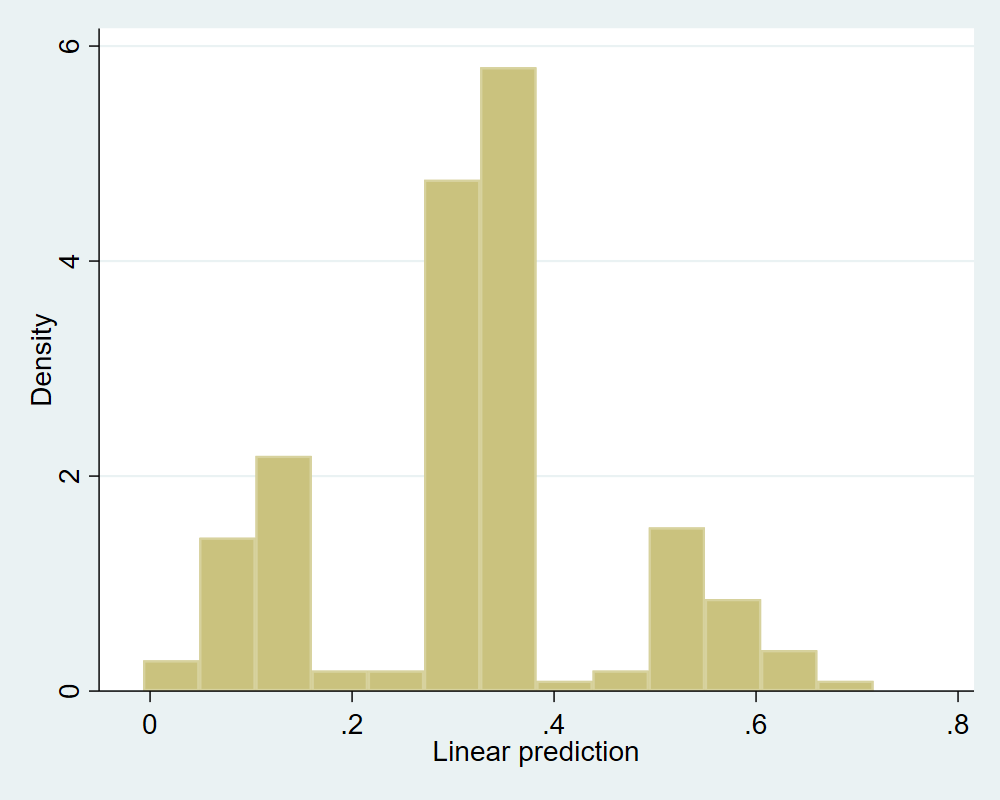

In [7]:
%%stata

hist yhat
su yhat

- The variance of a 1/0 (binary) depends on the values of $x$ so there is always heteroskedasticity, $\operatorname{var}(y | \mathbf{x})=p(\mathbf{x})[1-p(\mathbf{x})]$. We know that we need this assumption for correct SEs and F tests. So we can correct SEs in LPMs using the robust option. Still, we do know that SEs are not totally correct because they do not distribute normal either, even is we somehow correct for heteroskedasticity.

**So why do we use LPMs?**

- Not long ago, maybe 10 or 15 years ago, you couldn’t use other alternatives with large datasets (logistic, probit)

- The main reason to keep using LPM as a first step in modeling, it’s because the coefficients are easy to interpret

- In my experience, if the average of the outcome is not close to 0 or 1, not much difference between LPM or logit/probit (but SEs can change)

- Not a lot of good reasons to present LPM results in papers anymore. Again, as a first step, LPM is great

## Logistic or Logit model

- There are many ways to arrive to **logistic regression**, which makes things confusing

### One way to derive Logistic/Probit Model

- One way is to think about imposing a restriction on the functional form so that probabilities are bounded between 0 and 1 regardless for all values of $x$

- We can make p depend on a function of covariates $\beta_{0}+\beta_{1} X_{1}+\cdots+\beta_{p} X_{p}$, So we model

$$p_{i}=P\left(y_{i}=1 | X_{1}, \ldots, X_{p}\right)=F\left(\beta_{0}+\beta_{1} X_{1}+\cdots+\beta_{p} X_{p}\right)$$

- $F()$ is usually a cumulative distribution function. The most common are the logistic distribution and the standard normal cumulative distribution function

- If we use a logistic distribution function we arrive to the **logistic regression model**; if we use a standard normal cumulative density function, we arrive to the **probit model**

- Logistic response function, $\pi=\frac{e^{x}}{1+e^{x}}=\frac{1}{1+e^{-x}}$, where $x$ is any real number

- $\pi(x)$ is then restricted to be between 0 and 1

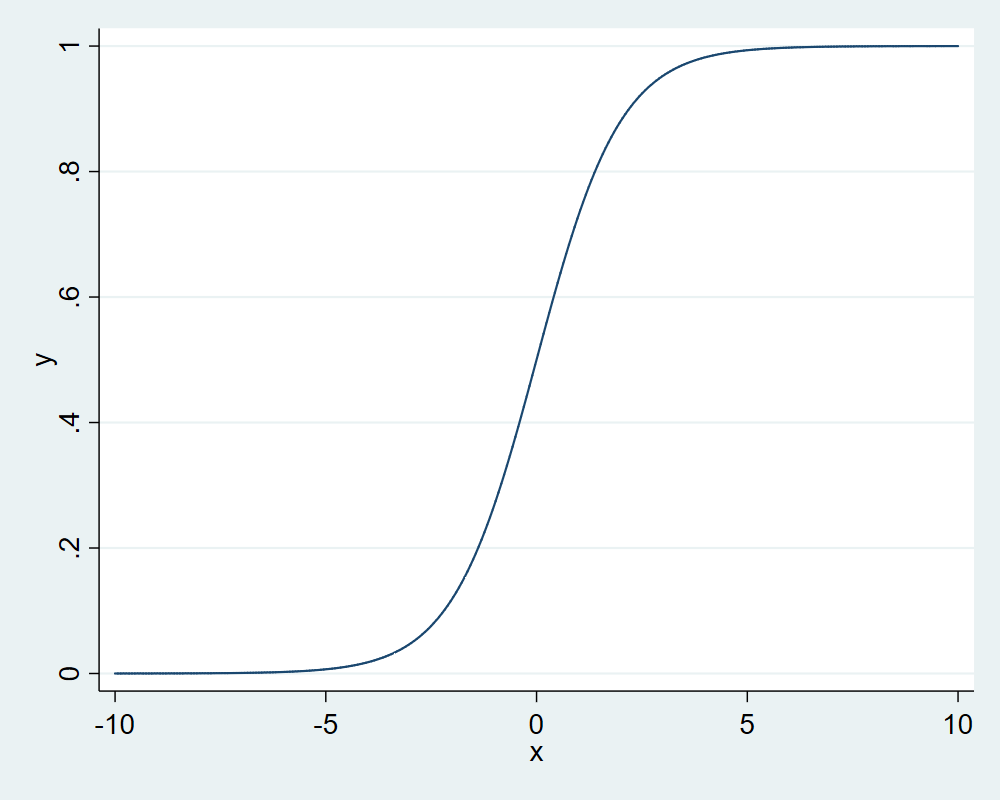

In [8]:
%%stata

twoway function y=exp(x) / (1+ exp(x)), range(-10 10)

- Notice a couple of things. If we use a model like the logistic response function, then it is not possible that the effect of x on π is linear; the effect depends on the value of x

- $\frac{p}{1-p}$ are defined as the odds, an $\log \left(\frac{p}{1-p}\right)$ are the "log odds" or the just the logit

### Yet another way - latent variable model

Let $y^{*}$ be an unobserved, or latent, variable, and suppose that

$$y^{*}=\beta_{0}+x\beta+\mu, y=1\left[y^{*}>0\right]$$

where we introduce the notation $1[\cdot]$ to define a binary outcome. 

- The function $1[\cdot]$ is called the indicator function, which takes on the value one if the event in brackets is true, and zero otherwise. Therefore, $y$ is one if $y^{*}>0$, and $y$ is zero if $y^{*} \leq 0$. 

- We assume that $\mu$ is independent of $x$ and that $\mu$ either has the standard logistic distribution or the standard normal distribution. 

- In either case, $\mu$ is symmetrically distributed about zero, which means that $1-F(-z)=F(z)$ for all real numbers $z$. 

We can derive the response probability for $y$

$$\begin{aligned} \mathrm{P}(y=1 | \mathbf{x}) &=\mathrm{P}\left(y^{*}>0 | \mathbf{x}\right)=\mathrm{P}\left[\mu>-\left(\beta_{0}+\mathbf{x} \boldsymbol{\beta}\right) | \mathbf{x}\right] \\ &=1-F\left[-\left(\beta_{0}+\mathbf{x} \boldsymbol{\beta}\right)\right]=F\left(\beta_{0}+\mathbf{x} \boldsymbol{\beta}\right) \end{aligned}$$

**Big picture**

- Not a big difference (in the probability scale) between probit and logit; it’s use is "cultural." If you are an economist you run probit models; for the rest of the world, there is the logistic model

- IMPORTANT: There is a big difference in terms of interpreting a regression output because the coefficients are estimated in different scales

- In the logistic model the effect of a covariate can be made linear in terms of the odds-ratio; you can’t do the same in probit models

- There is no decomposing variance; now we are in a non-linear world

### Maximum Likelihood Estimation

**Bernoulli example**

- Suppose that we know that the following numbers were simulated using a Bernoulli distribution: 0 0 0 1 1 1 0 1 1 1
    
- We can denote by $y_{1}, y_{2}, \dots, y_{10}$

- Recall that the pdf of a Bernoulli random variable is $f(y ; p)=p^{y}(1-p)^{1-y}$, where $y \in\{0,1\}$. The probability of 1 is $p$ while the probability of 0 is $(1 − p)$

- We want to figure out what is the $\hat{p}$ we used to generate those numbers

- The probability of the first number will be given by $p^{y_{1}}(1-p)^{1-y_{1}}$ the probability of the second by $p^{y_{2}}(1-p)^{1-y_{2}}$ and so on..

- If we assume that the numbers above are independent, the joint probability of seeing all 10 numbers will be given by the multiplication of the individual probabilities

- We use the product symbol $\prod$, For example, $\prod_{i=1}^{2} x_{i}=x_{1} * x_{2}$

- So we can write the joint probability or the likelihood (L) of seeing those 10 numbers as:

$$L(p)=\prod_{i=1}^{10} p^{y_{i}}(1-p)^{1-y_{i}}$$

- Remember that we are trying to find the $\hat{p}$ that was used to generate the 10 numbers. In other words, we want to find the $p$ that maximizes the likelihood function $L(p)$ (we use $\hat{p}$ because that’s the optimal one)

- Said another way we want to find the $\hat{p}$ that makes the joint likelihood of seeing those numbers as high as possible

- Sounds like calculus... We can take the derivative of $L(p)$ with respect to $p$ and set it to zero to find the optimal $\hat{p}$

- We take the log to simplify taking the derivative; the log function is a monotonic transformation, it won’t change the optimal $\hat{p}$ value

- We will use several properties of the log, in particular:

$$\log \left(x^{a} y^{b}\right)=\log \left(x^{a}\right)+\log \left(y^{b}\right)=a * \log (x)+b * \log (y)$$

- The advantage of taking the log is that the multiplication becomes a summation. So now we have:

$$\ln L(p)=\sum_{i=1}^{n} y_{i} \ln (p)+\sum_{i=1}^{n}\left(1-y_{i}\right) \ln (1-p)$$

$$\ln L(p)=n \overline{y} \ln (p)+(n-n \overline{y}) \ln (1-p)$$

- This looks a lot easier; all we have to do is take $\frac{d \ln (p)}{d p}$, set it to zero, and solve for $p$ (I made it more general, $n = 10$)

$$\frac{d \ln (p)}{d p}=\frac{n \overline{y}}{p}-\frac{(n-n \overline{y})}{(1-p)}=0$$

- After solving, we’ll find that $\hat{p}\left(y_{i}\right)=\overline{y}=\sum_{i=1}^{n} \frac{y_{i}}{n}$

- So that’s the MLE estimator. This is saying more or less the obvious: our best guess for the $p$ that generated the data is the proportion of 1s, in this case $p = 0.6$

**Normal example**

What about if we do the same but now we have numbers like

90.46561

105.1319

117.5445

102.7179

102.7788

107.6234

94.87266

95.48918

75.63886

87.40594

I tell you that they were simulated from a normal distribution with parameters $\mu$ and $\sigma^{2}$. The numbers are independent. Your job is to come up with the best guess of the two parameters.

- As before, we know that formula for the pdf of a normal and because the observations are independent we multiply the densities:

$$L\left(\mu, \sigma^{2}\right)=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(\frac{-\left(y_{i}-\mu\right)^{2}}{2 \sigma^{2}}\right)$$

- Remember the rules of exponents. We can write the likelihood as:

$$L\left(\mu, \sigma^{2}\right)=\left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)^{n} \exp \left(-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2}\right)$$

- As before, we can simplify the problem by taking the ln to help us take the derivatives. After taking the ln, we have:

$$\ln L\left(\mu, \sigma^{2}\right)=-\frac{n}{2} \ln \left(2 \pi \sigma^{2}\right)-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2}$$

- All we have left is to take the derivative with respect to our two unknowns, $\mu$ and $\sigma^{2}$ and set them to zero. Let’s start with $\mu$:

$$\frac{\partial \ln \left(L\left(\mu, \sigma^{2}\right)\right)}{\partial \mu}=2 \frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)=0$$

- The above expression reduces to

$$\sum_{i=1}^{n}\left(y_{i}-\hat{\mu}\right)=0$$

- Solving, we find that $\hat{\mu}=\frac{\sum_{i=1}^{n} y_{i}}{n}=\overline{y}$, In other words, our best guess is just the mean of the numbers

- We can also figure out the variance by taking the derivative with respect to $\sigma^{2}$. We will find that $\hat{\sigma}^{2}=\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{\mu}\right)^{2}}{n}$

- We know that this formula is biased. We need to divide by (n − 1) instead

- We just figured out that the best guess is to calculate the sample mean and sample variance

**Linear regression**

- What about if I told you that the number I generated is a linear function of one variable, say, $x_{1}$? 

- Now we want to find the parameters $\beta_{0}$, $\beta_{1}$, $\sigma^{2}$ that maximize the likelihood function

- The likelihood function is now:

$$L\left(\beta_{0}, \beta_{1}, \sigma^{2}\right)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{1 i}\right)^{2}\right)$$

- The ln likelihood is

$$\ln L\left(\mu, \sigma^{2}\right)=-\frac{n}{2} \ln \left(2 \pi \sigma^{2}\right)-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{1 i}\right)^{2}$$

- If we take the derivatives with respect to $\beta_{0}$ and $\beta_{1}$ we will find exactly the same first order conditions as we did with OLS. For example, with respect to $\beta_{1}$:

$$\sum_{i=1}^{n} x_{1}\left(y_{i}-\beta_{0}-\beta_{1} x_{1}\right)=0$$

- The MLE estimate of $\sigma^{2}$ will be biased but we divide by $(n-p-1)$ instead 

- MLE is much more general than OLS. You will use MLE for logit, Probit, Poisson, mixture models...

- AIC and BIC to compare non-nested models are based on the log likelihood function

### MM(Method of Moments)

**MLE**

- ML estimators use assumptions about the specific families of distributions for the random variables to derive an objective function

- We maximize this objective function to select the parameters that are most likely to have generated the observed data

**GMM(Generalize Method of Moments)**

- GMM estimators use assumptions about the moments of the random variables to derive an objective function

- The assumed moments of the random variables are known as the population moments

- The data provide the sample moments

- We minimize the objective function to select the parameters that yield the smallest differences between the population moments and the sample moments

- For each assumed population moment, we obtain a population moment condition

- For each population moment condition, there is a sample moment condition

- In the method of moments (MM), we have the same number of sample moment conditions as we have parameters

- In the generalized method of moments (GMM), we more sample moment conditions than we have parameters

<br>

#### Population Mean

- We estimate the mean of a distribution by the sample, the variance by the sample variance, etc

- We want to estimate $\mu=E[y]$

- The population moment condition is $E[y]-\mu=0$

- The sample moment condition is $(1 / N) \sum_{i=1}^{N} y_{i}-\mu=0$

- Our estimator is obtained by solving the sample moment condition for the parameter

- Estimators that solve sample moment equations to produce estimates are called method-of-moments (MM) estimators. This method dates back to Pearson (1895)

<br>

#### Ordinary least squares (OLS) is an MM estimator

- We know that OLS estimates the parameters of the condtional expectation of $y_{i}=\mathbf{x}_{i} \boldsymbol{\beta}+\epsilon_{i}$ under the assumption that $E[\epsilon | \mathbf{x}]=0$

- Standard probability theory implies that $E[\epsilon | \mathbf{x}]=0 \Rightarrow E[\mathbf{x} \epsilon]=\mathbf{0}$

- So the population moment conditions for OLS are $E[\mathbf{x}(y-\mathbf{x} \boldsymbol{\beta})]=\mathbf{0}$

- The corresponding sample moment condtions are $(1 / N) \sum_{i=1}^{N} \mathbf{x}_{i}\left(y_{i}-\mathbf{x}_{i} \boldsymbol{\beta}\right)=\mathbf{0}$

- Solving for $\beta$ yields $\widehat{\boldsymbol{\beta}}_{O L S}=\left(\sum_{i=1}^{N} \mathbf{x}_{i}^{\prime} \mathbf{x}_{i}\right)^{-1} \sum_{i=1}^{N} \mathbf{x}_{i}^{\prime} y_{i}$

### Logistic Model

**Example: married wome’s labor force participation**

Women’s labor force participation (inlf); main predictor is "extra" money in family.

In [9]:
%%stata

use MROZ, clear
de


Contains data from MROZ.dta
  obs:           753                          
 vars:            22                          2 Mar 1999 11:30
 size:        36,897                          
--------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------------------------
inlf            byte    %9.0g                 =1 if in lab frce, 1975
hours           int     %9.0g                 hours worked, 1975
kidslt6         byte    %9.0g                 # kids < 6 years
kidsge6         byte    %9.0g                 # kids 6-18
age             byte    %9.0g                 woman's age in yrs
educ            byte    %9.0g                 years of schooling
wage            float   %9.0g                 est. wage from earn, hrs
repwage         float   %9.0g                 rep. wage a

- We want to estimate the following model:

$$P\left(i n l f_{i}=1 | \text {nwifeinc}_{i}\right)=\Lambda\left(\beta_{0}+\beta_{1} \text {nwifeinc}_{i}\right)$$

By convention, when we write capital lambda, $\Lambda$, we imply a logistic model ($\Lambda$ is not a non-linear function). When we write phi, $\phi$, we imply a probit model.

- The other common way of writing the logistic model is:

$$\log \left(\frac{inlf_{i}}{1-inlf_{i}}\right)=\beta_{0}+\beta_{1} \text {nwifeinc}_{i}$$

or

$$\operatorname{logit}\left(inlf_{i}\right)=\beta_{0}+\beta_{1} \text {nwifeinc}_{i}$$

In [10]:
%%stata

logit inlf nwifeinc, nolog


Logistic regression                             Number of obs     =        753
                                                LR chi2(1)        =      10.44
                                                Prob > chi2       =     0.0012
Log likelihood = -509.65435                     Pseudo R2         =     0.0101

------------------------------------------------------------------------------
        inlf |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    nwifeinc |  -.0207569   .0065907    -3.15   0.002    -.0336744   -.0078394
       _cons |   .6946059   .1521569     4.57   0.000      .396384    .9928279
------------------------------------------------------------------------------



A one thousand increase in "extra" income decreases the log-odds of participating in the labor force by 0.021. And it’s statistically significant (p-value = 0.002). Same Wald test as before: $−.0207569/.0065907 = −3.1494227$. The difference is that the it’s not t-student distributed but normally distributed.

**What about that Pseudo $R^{2}$?**

- We can’t partition variance into explained and unexplained as before so we don’t have a nice $R^{2}$

- But one way to come up with a measure of fit is to use the likelihood function to compare the current model to the model without any explanatory variable (the null model)

- Psuedo $R^{2}$ is not a measure of how good the model is at prediction; just how better it fits compared to null model. I don’t think that calling it pseudo $R^{2}$ is a good idea

- Comparing the log-likelihood of models is a way of comparing goodness of fit. If nested, we have the a test (LRT); if not nested, we have BIC or AIC

<br>

**Example Continued, Let’s try a different predictor**

We will estimate $\log \left(\frac{inlf_{i}}{1-inlf_{i}}\right)=\beta_{0}+\beta_{1} h s p_{i}$, where hsp if education $> 12$

In [11]:
%%stata

gen hsp = 0
replace hsp = 1 if educ > 12 & educ ~= .
logit inlf hsp, nolog


(212 real changes made)

Logistic regression                             Number of obs     =        753
                                                LR chi2(1)        =      15.08
                                                Prob > chi2       =     0.0001
Log likelihood = -507.33524                     Pseudo R2         =     0.0146

------------------------------------------------------------------------------
        inlf |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         hsp |   .6504074   .1704773     3.82   0.000     .3162781    .9845368
       _cons |   .0998982    .086094     1.16   0.246     -.068843    .2686393
------------------------------------------------------------------------------



- The log-odds of entering the labor force is 0.65 higher for those with more than high school education compared to those with high-school completed or less than high-school.

- Let’s do our usual math to make sense of coefficients. For those with $hsp = 1$, the model is $\log \left(\frac{inlf_{hsp}}{1-inlf_{hsp}}\right)=\beta_{0}+\beta_{1}$, For those with $hsp = 0$, the model is $\log \left(\frac{inlf_{nohsp}}{1-inlf_{nohsp}}\right)=\beta_{0}$. The difference of the two is 

$$\log \left(\frac{inlf_{hsp}}{1-inlf_{hsp}}\right) - \log \left(\frac{inlf_{hsp}}{1-inlf_{hsp}}\right) = \beta_{1}$$

- Then the (in)famous odds-ratio

$$\frac{\frac{inlf_{hsp}}{1-inlf_{hsp}}}{\frac{inlf_{nohsp}}{1-inlf_{nohsp}}}=e^{\beta_{1}}$$

In our example, $e^{.6504074} = 1.92$. So the odds of entering the labor force is almost twice as high for those with more than high school education compare to those without. That’s the way most reporters would report this finding. And it’s correct.

- The problem is that we would then interpret this as saying that the probability of entering the labor force is twice as high for those with more than high school. That interpretation is wrong. Odds ratios are NOT relative risks or relative probabilities.

- With only a dummy variable as predictor we can very easily calculate the probabilities. Remember, we are modeling $\log \left(\frac{p}{1-p}\right)=\beta_{0}+\beta_{1} x$. We also know that we can solve for p:

$$p=\frac{e^{\beta_{0}+\beta_{1} x}}{1+e^{\beta_{0}+\beta_{1} x}}$$

So we can calculate the probability for those with more than high school education and the probability for those with less

**Big Picture**

- A ratio of odds is hard to interpret at best. At worse, it is misleading

- We tend to think of them as a ratio of probabilities, but they are NOT

**Example: Back to the continuous case**

- Let’s go back to the model $\log \left(\frac{inlf_{i}}{1-inlf_{i}}\right)=\beta_{0}+\beta_{1} \text {nwifeinc}_{i}$. We can also take $e^{\beta_{1}}$. In this case, $\exp (-.0207569)=.97945704$.

- A thousand dollars of extra income decreases the odds of participating in the labor force by a factor of 0.98

- Again, same issue. We can also solve for p or inlf in this case but not as easy as before because nwifeinc is continous

- We could take, as with the linear model, the derivative of p with respect to nwifeinc, but we know that it’s non-linear so there is not a single effect; it depends on the values of nwifeinc

**interpretation**

If $x_{j}$ is a roughly continuous variable, its partial effect on $p(\mathbf{x})=\mathrm{P}(y=1 | \mathbf{x})$ is obtained from the partial derivative.

$$\frac{\partial p(\mathbf{x})}{\partial x_{j}}=f\left(\beta_{0}+\mathbf{x} \boldsymbol{\beta}\right) \beta_{j}$$

Where $f(z) \equiv \frac{d F}{d z}(z)$

- Partial effect at the average (PEA)

$$f\left(\hat{\beta}_{0}+\overline{\mathbf{x}} \hat{\boldsymbol{\beta}}\right)=f\left(\hat{\beta}_{0}+\hat{\beta}_{1} \overline{x}_{1}+\hat{\beta}_{2} \overline{x}_{2}+\ldots+\hat{\beta}_{k} \overline{x}_{k}\right)$$

- Average partial effect (APE) or Average marginal effect (AME)

$$n^{-1} \sum_{i=1}^{n}\left[f\left(\hat{\beta}_{0}+\mathbf{x}_{i} \hat{\boldsymbol{\beta}}\right) \hat{\beta}_{j}\right]=\left[n^{-1} \sum_{i=1}^{n} f\left(\hat{\beta}_{0}+\mathbf{x}_{i} \hat{\boldsymbol{\beta}}\right)\right] \hat{\beta}_{j}$$

In [12]:
%%stata

qui logit inlf nwifeinc, nolog
margins, dydx(nwifeinc)


Average marginal effects                        Number of obs     =        753
Model VCE    : OIM

Expression   : Pr(inlf), predict()
dy/dx w.r.t. : nwifeinc

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    nwifeinc |  -.0050217   .0015533    -3.23   0.001     -.008066   -.0019773
------------------------------------------------------------------------------



### Summary

- Main difficulty with logistic models is to interpret parameters

- We estimate models in log-odds scale, we can easily convert coefficients into odds ratios but we really care about probabilities because a ratio of odds is not that informative

- With more covariates, we just add our usual "holding other factors constant" or "taking into account other factors"

### Homework

Due by 11:35 AM Monday, June 17

Let grad be a dummy variable for whether a student-athlete at a large university graduates in five years. Let hsGPA and SAT be high school grade point average and SAT score, respectively. Let study be the number of hours spent per week in an organized study hall. Suppose that, using data on 420 student-athletes, the following logit model is obtained:

$$\hat{\mathrm{P}}(g r a d=1 | h s G P A, S A T, s t u d y)=\Lambda(-1.17+.24 h s G P A+.00058 S A T+ .073 \text { study })$$

where $\Lambda(z)=\exp (z) /[1+\exp (z)]$  is the logit function. Holding hsGPA fixed at 3.0 and SAT fixed at 1,200, compute the estimated difference in the graduation probability for someone who spent 10 hours per week in study hall and someone who spent 5 hours per week.